In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.container import BarContainer


In [2]:
df = pd.read_csv("data/Airbnb_Open_Data.csv")



/var/folders/jh/rt55rnlj5lx_xsb8c7v63bj40000gn/T/ipykernel_2130/774125924.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Airbnb_Open_Data.csv")


[Text(0, 3, '53701'),
 Text(0, 3, '116'),
 Text(0, 3, '46556'),
 Text(0, 3, '2226')]

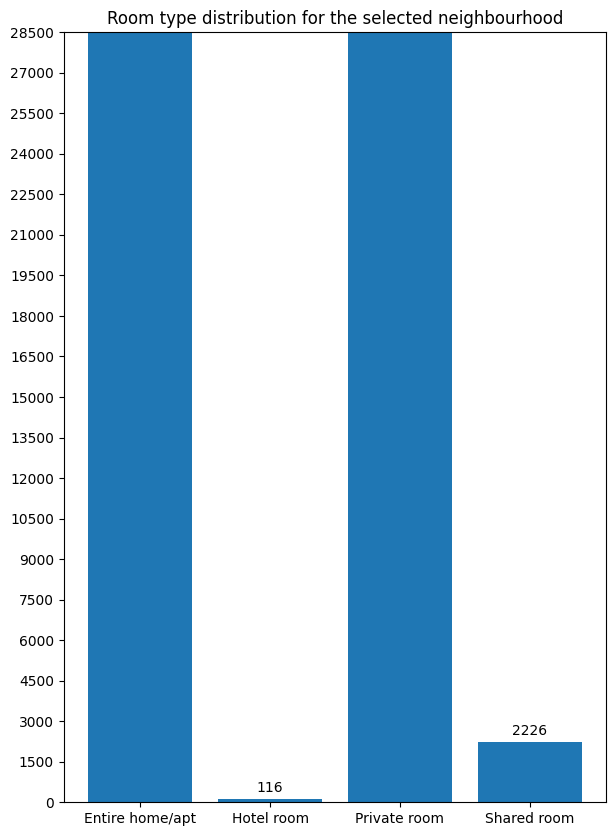

In [64]:
fig, ax = plt.subplots(figsize=(7,10))
plt.ylim(top=5500, bottom=0)
plt.title("Room type distribution for the selected neighbourhood")
plt.yticks(np.arange(0, 30000, 1500))
room_typed_accumulated = df.groupby("room type")["room type"].count()
room_types = room_typed_accumulated.index.values
counts = room_typed_accumulated.values
rects = ax.bar(room_types, counts)
ax.bar_label(container=rects, padding=3)

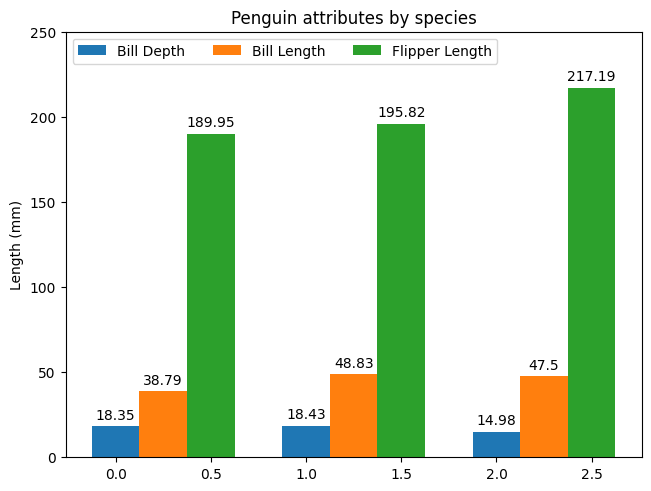

In [22]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()